In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
#print(y)

In [3]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [4]:
# extract sepal length and petal length
X = df.iloc[0:100,[0,2]].values
#print(x)

In [5]:
def phiFunc(z):
    return z

In [6]:
def predict(Xi,W,w0):
    z = np.dot(W,Xi) + w0
    yHat = phiFunc(z)
    return yHat

In [7]:
def calcError(y,X,W,w0):
    sumError = 0 
    for i in range(y.shape[0]):
        yi = y[i]
        Xi = X[i,:]
        yHat = predict(Xi,W,w0)
        error = yi - yHat
        sumError += np.power(error,2)
    return sumError/2

In [8]:
eta=0.0001
n_iter=10
W = np.zeros((1,2))
w0 = 0
for n in range(n_iter):
    deltaW = 0
    deltaW0 = 0
    for i in range(y.shape[0]):
        yi = y[i]
        Xi = X[i,:]
        yHat = predict(Xi,W,w0)
        yi_m_yHat = yi - yHat
        deltaW0 = deltaW0 + eta * yi_m_yHat
        deltaW =  deltaW  + eta * yi_m_yHat * Xi
    W = W + deltaW
    w0 = w0 + deltaW0
    sumError = calcError(y,X,W,w0)
    print(sumError)
print(W,w0)

[48.06916269]
[46.75624785]
[45.67588153]
[44.69132935]
[43.75388836]
[42.84602749]
[41.96125761]
[41.09700496]
[40.25208795]
[39.42582377]
[[-0.02122706  0.09641832]] [-0.01174401]


In [9]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [12]:
eta=0.01
n_iter=15
W = np.zeros((1,2))
w0 = 0
for n in range(n_iter):
    deltaW = 0
    deltaW0 = 0
    for i in range(y.shape[0]):
        yi = y[i]
        Xi = X_std[i,:]
        yHat = predict(Xi,W,w0)
        yi_m_yHat = yi - yHat
        deltaW0 = deltaW0 + eta * yi_m_yHat
        deltaW =  deltaW  + eta * yi_m_yHat * Xi
    W = W + deltaW
    w0 = w0 + deltaW0
    sumError = calcError(y,X_std,W,w0)
    print(sumError)
print(W,w0)

[33.82690622]
[23.15304865]
[16.10855631]
[11.45935877]
[8.39099887]
[6.36595425]
[5.02947293]
[4.14742701]
[3.56529767]
[3.18110614]
[2.92754886]
[2.76020708]
[2.64976548]
[2.57687665]
[2.52877175]
[[-0.12625616  1.10479201]] [1.8710619e-16]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


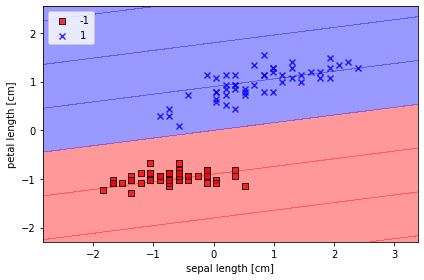

In [11]:
from matplotlib.colors import ListedColormap
resolution=0.02

# setup marker generator and color map
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])


# plot the decision surface
x1_min, x1_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
x2_min, x2_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

XiArray = np.array([xx1.ravel(), xx2.ravel()]).T
Z = np.array([])
for Xi in XiArray:
    yHat = predict(Xi,W,w0)
    Z = np.append(Z,yHat)

Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# plot class samples
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X_std[y == cl, 0], y=X_std[y == cl, 1],
                alpha=0.8, c=cmap(idx),
                edgecolor='black',
                marker=markers[idx], 
                label=cl)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()